We want to test how an imbalanced initialization affects convergence depending on $\gamma$, or if conversely a small $\gamma$ on an imbalanced community structure given a balanced initialization is relevant.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from utils import *
from sbm_class import *
from neal_batched import *
from neal_sequential import *
from batched import *
from sequential import *
from metrics import *

In [47]:
np.random.seed(0)

In [48]:
balanced_network = False
weak = True

# set parameters for the network
n = 400
k = 4

imb = 0.3

if weak:
    p = 0.17
    q = 0.08
    alpha = 0.25
else:
    p = 0.4
    q = 0.2
    alpha = 0.45
# set parameters for the samplers
n_iter = 25
burn_in = 0

alpha_p = 1
beta_p = 1
alpha_q = 1
beta_q = 1

# changing parameters
pi = np.ones(k) # deterministic prior
gamma_list = [0, 0.1, 1, 10, 10000]

# number of runs 
N = 20


In [49]:
# z_t is just [1,1,...,1,2,2,...,2,...,k,k,...,k]
z_t = np.repeat(np.arange(k), n//k)

if not balanced_network:
    # we move alpha*n/(k-1) nodes from each community to the first one
    n_to_move = int(imb*n/k)
    for i in range(1,k):
        index = i * n // k - 1
        z_t[index:index+n_to_move] = 0

z_t = np.random.permutation(z_t)

In [50]:
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False, z_t=z_t)
A = sbm.get_A()
z = sbm.get_z()
# warm initialization
z_init = warm_initializer(z, alpha, n, k)

In [51]:
# for N iterations, run all samplers (batched and Neal batched with the different values of gamma)
# and store in a dataframe all the label at each iteration
p_list = np.zeros((len(gamma_list)+1, N, n_iter))
q_list = np.zeros((len(gamma_list)+1, N, n_iter))
loss_list =  np.zeros((len(gamma_list)+1, N, n_iter))

for iter in range(1, N+1):
    print("Deterministic prior, iteration ", iter)
    sampler = batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, pi_pri = pi)
    sampler.run(n_iter, burn_in)
    z_list_batched = sampler.get_z_list()
    losses_batched = [loss(z, z_list_batched[i])[0] for i in range(n_iter)]
    loss_list[0, iter-1, :] = losses_batched
    p_list[0, iter-1, :] = sampler.get_p_list()
    q_list[0, iter-1, :] = sampler.get_q_list()

for j, gamma in enumerate(gamma_list):
    for iter in range(1, N+1):
        print("Gamma = ", gamma, ", iteration ", iter)
        sampler = Neal_batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, gamma = gamma)
        sampler.run(n_iter, burn_in)
        z_list = sampler.get_z_list()
        losses = [loss(z, z_list[i])[0] for i in range(n_iter)]
        loss_list[j+1, iter-1, :] = losses
        p_list[j+1, iter-1, :] = sampler.get_p_list()
        q_list[j+1, iter-1, :] = sampler.get_q_list()


Deterministic prior, iteration  1


100%|██████████| 25/25 [00:00<00:00, 125.76it/s]


Deterministic prior, iteration  2


100%|██████████| 25/25 [00:00<00:00, 125.73it/s]


Deterministic prior, iteration  3


100%|██████████| 25/25 [00:00<00:00, 124.00it/s]


Deterministic prior, iteration  4


100%|██████████| 25/25 [00:00<00:00, 117.15it/s]


Deterministic prior, iteration  5


100%|██████████| 25/25 [00:00<00:00, 122.18it/s]


Deterministic prior, iteration  6


100%|██████████| 25/25 [00:00<00:00, 92.89it/s]


Deterministic prior, iteration  7


100%|██████████| 25/25 [00:00<00:00, 107.96it/s]


Deterministic prior, iteration  8


100%|██████████| 25/25 [00:00<00:00, 110.42it/s]


Deterministic prior, iteration  9


100%|██████████| 25/25 [00:00<00:00, 98.79it/s] 


Deterministic prior, iteration  10


100%|██████████| 25/25 [00:00<00:00, 114.13it/s]


Deterministic prior, iteration  11


100%|██████████| 25/25 [00:00<00:00, 110.76it/s]


Deterministic prior, iteration  12


100%|██████████| 25/25 [00:00<00:00, 108.54it/s]


Deterministic prior, iteration  13


100%|██████████| 25/25 [00:00<00:00, 113.73it/s]


Deterministic prior, iteration  14


100%|██████████| 25/25 [00:00<00:00, 112.04it/s]


Deterministic prior, iteration  15


100%|██████████| 25/25 [00:00<00:00, 106.02it/s]


Deterministic prior, iteration  16


100%|██████████| 25/25 [00:00<00:00, 106.34it/s]


Deterministic prior, iteration  17


100%|██████████| 25/25 [00:00<00:00, 109.66it/s]


Deterministic prior, iteration  18


100%|██████████| 25/25 [00:00<00:00, 113.39it/s]


Deterministic prior, iteration  19


100%|██████████| 25/25 [00:00<00:00, 114.57it/s]


Deterministic prior, iteration  20


100%|██████████| 25/25 [00:00<00:00, 103.91it/s]


Gamma =  0 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 62.00it/s]


Gamma =  0 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 98.79it/s]


Gamma =  0 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 90.58it/s]


Gamma =  0 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 108.30it/s]


Gamma =  0 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 114.47it/s]


Gamma =  0 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 113.56it/s]


Gamma =  0 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 111.65it/s]


Gamma =  0 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 117.43it/s]


Gamma =  0 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 128.30it/s]


Gamma =  0 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 131.33it/s]


Gamma =  0 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 125.02it/s]


Gamma =  0 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 128.22it/s]


Gamma =  0 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 131.41it/s]


Gamma =  0 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 123.02it/s]


Gamma =  0 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 98.75it/s]


Gamma =  0 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 127.56it/s]


Gamma =  0 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 128.17it/s]


Gamma =  0 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 125.07it/s]


Gamma =  0 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 129.17it/s]


Gamma =  0 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 124.22it/s]


Gamma =  0.1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 131.59it/s]


Gamma =  0.1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 130.33it/s]


Gamma =  0.1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 125.32it/s]


Gamma =  0.1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 123.21it/s]


Gamma =  0.1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 129.41it/s]


Gamma =  0.1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 131.23it/s]


Gamma =  0.1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 125.47it/s]


Gamma =  0.1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 127.97it/s]


Gamma =  0.1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 130.51it/s]


Gamma =  0.1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 125.18it/s]


Gamma =  0.1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 125.18it/s]


Gamma =  0.1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 127.85it/s]


Gamma =  0.1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 131.06it/s]


Gamma =  0.1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 125.61it/s]


Gamma =  0.1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 124.74it/s]


Gamma =  0.1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 101.94it/s]


Gamma =  0.1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 126.45it/s]


Gamma =  0.1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 131.69it/s]


Gamma =  0.1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 130.15it/s]


Gamma =  0.1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 123.35it/s]


Gamma =  1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 124.88it/s]


Gamma =  1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 131.62it/s]


Gamma =  1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 126.63it/s]


Gamma =  1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 131.53it/s]


Gamma =  1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 115.92it/s]


Gamma =  1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 131.56it/s]


Gamma =  1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 127.77it/s]


Gamma =  1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 124.25it/s]


Gamma =  1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 128.17it/s]


Gamma =  1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 127.49it/s]


Gamma =  1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 124.99it/s]


Gamma =  1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 126.57it/s]


Gamma =  1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 127.36it/s]


Gamma =  1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 126.24it/s]


Gamma =  1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 96.85it/s]


Gamma =  1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 131.24it/s]


Gamma =  1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 124.92it/s]


Gamma =  1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 127.80it/s]


Gamma =  1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 124.92it/s]


Gamma =  1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 131.36it/s]


Gamma =  10 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 123.18it/s]


Gamma =  10 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 126.03it/s]


Gamma =  10 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 130.42it/s]


Gamma =  10 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 128.41it/s]


Gamma =  10 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 130.60it/s]


Gamma =  10 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 128.04it/s]


Gamma =  10 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 125.51it/s]


Gamma =  10 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 127.32it/s]


Gamma =  10 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 130.77it/s]


Gamma =  10 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 128.76it/s]


Gamma =  10 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 126.95it/s]


Gamma =  10 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 128.26it/s]


Gamma =  10 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 123.41it/s]


Gamma =  10 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 89.39it/s] 


Gamma =  10 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 131.42it/s]


Gamma =  10 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 124.38it/s]


Gamma =  10 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 119.03it/s]


Gamma =  10 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 124.98it/s]


Gamma =  10 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 125.62it/s]


Gamma =  10 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 128.73it/s]


Gamma =  10000 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 127.51it/s]


Gamma =  10000 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 120.55it/s]


Gamma =  10000 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 115.84it/s]


Gamma =  10000 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 105.55it/s]


Gamma =  10000 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 105.48it/s]


Gamma =  10000 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 113.66it/s]


Gamma =  10000 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 110.33it/s]


Gamma =  10000 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 121.59it/s]


Gamma =  10000 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 124.93it/s]


Gamma =  10000 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 124.50it/s]


Gamma =  10000 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 130.87it/s]


Gamma =  10000 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 97.74it/s]


Gamma =  10000 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 127.81it/s]


Gamma =  10000 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 131.30it/s]


Gamma =  10000 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 129.38it/s]


Gamma =  10000 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 123.31it/s]


Gamma =  10000 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 124.94it/s]


Gamma =  10000 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 124.88it/s]


Gamma =  10000 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 129.38it/s]


Gamma =  10000 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 126.03it/s]


In [52]:
# threshold for the loss
threshold = 0.2
# compute the percentage of runs that have a loss below the threshold
print("Deterministic prior")
# for the N runs, we check if the loss is below the threshold once in the last 10 iterations
conv = np.sum(loss_list[0, :, -10:] < threshold, axis=1)>0
conv = np.sum(conv)
print("Percentage of runs with loss below threshold: ", conv / N)
for a, gamma in enumerate(gamma_list):
    print("Gamma: ", gamma)
    conv = np.sum(loss_list[a+1, :, -10:] < threshold, axis=1)>0
    conv = np.sum(conv)
    print("Percentage of runs with loss below threshold: ", conv / N)

Deterministic prior
Percentage of runs with loss below threshold:  1.0
Gamma:  0
Percentage of runs with loss below threshold:  0.95
Gamma:  0.1
Percentage of runs with loss below threshold:  0.95
Gamma:  1
Percentage of runs with loss below threshold:  0.9
Gamma:  10
Percentage of runs with loss below threshold:  0.95
Gamma:  10000
Percentage of runs with loss below threshold:  0.95


In [53]:
# p_lim = 0.5
# q_lim = 0.5
# loss_lim = 1
# pic = True


# # plot the results
# # deterministic prior first
# plt.figure(figsize=(15, 5))
# plt.subplot(1,3,1)
# plt.title("p")
# plt.axhline(y=p, color='r', linestyle='--')
# df_p = pd.DataFrame(p_list[0])
# df_p.boxplot()
# plt.ylim(0, p_lim)
# plt.subplot(1,3,2)
# plt.title("q")
# plt.axhline(y=q, color='r', linestyle='--')
# df_q = pd.DataFrame(q_list[0])
# df_q.boxplot()
# plt.ylim(0, q_lim)
# plt.subplot(1,3,3)
# plt.title("Loss")
# df_loss = pd.DataFrame(loss_list[0])
# df_loss.boxplot()
# plt.ylim(0, loss_lim)
# if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_det_r_{N}_steps_{n_iter}.png')
# plt.show()

# for a, gamma in enumerate(gamma_list):
#     df_p = pd.DataFrame(p_list[a+1])
#     df_q = pd.DataFrame(q_list[a+1])
#     df_loss = pd.DataFrame(loss_list[a+1])
#     print("Gamma: ", gamma)
#     plt.figure(figsize=(15, 5))
#     plt.subplot(1,3,1)
#     plt.title("p")
#     plt.axhline(y=p, color='r', linestyle='--')
#     df_p.boxplot()
#     plt.ylim(0, p_lim)
#     plt.subplot(1,3,2)
#     plt.title("q")
#     plt.axhline(y=q, color='r', linestyle='--')
#     df_q.boxplot()
#     plt.ylim(0, q_lim)
#     plt.subplot(1,3,3)
#     plt.title("Loss")
#     df_loss.boxplot()
#     plt.ylim(0, loss_lim)

        
#     if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_gamma{gamma}_r_{N}_steps_{n_iter}.png')

#     plt.show()


Attempt with balanced initialization

In [71]:
alpha = 0.3

In [72]:
# z_t is just [1,1,...,1,2,2,...,2,...,k,k,...,k]
z_t = np.repeat(np.arange(k), n//k)

if not balanced_network:
    # we move alpha*n/(k-1) nodes from each community to the first one
    n_to_move = int(alpha*n/(k-1))
    for i in range(1,k):
        index = i * n // k - 1
        z_t[index:index+n_to_move] = 0

In [73]:
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False, z_t=z_t)
A = sbm.get_A()
z = sbm.get_z()
# warm initialization
z_init = np.repeat(np.arange(k), n//k)

In [74]:
loss(z_t, z_init)

(0.2975, (0, 1, 2, 3))

In [75]:
# for N iterations, run all samplers (batched and Neal batched with the different values of gamma)
# and store in a dataframe all the label at each iteration
p_list = np.zeros((len(gamma_list)+1, N, n_iter))
q_list = np.zeros((len(gamma_list)+1, N, n_iter))
loss_list =  np.zeros((len(gamma_list)+1, N, n_iter))

for iter in range(1, N+1):
    print("Deterministic prior, iteration ", iter)
    sampler = batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, pi_pri = pi)
    sampler.run(n_iter, burn_in)
    z_list_batched = sampler.get_z_list()
    losses_batched = [loss(z, z_list_batched[i])[0] for i in range(n_iter)]
    loss_list[0, iter-1, :] = losses_batched
    p_list[0, iter-1, :] = sampler.get_p_list()
    q_list[0, iter-1, :] = sampler.get_q_list()

for j, gamma in enumerate(gamma_list):
    for iter in range(1, N+1):
        print("Gamma = ", gamma, ", iteration ", iter)
        sampler = Neal_batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, gamma = gamma)
        sampler.run(n_iter, burn_in)
        z_list = sampler.get_z_list()
        losses = [loss(z, z_list[i])[0] for i in range(n_iter)]
        loss_list[j+1, iter-1, :] = losses
        p_list[j+1, iter-1, :] = sampler.get_p_list()
        q_list[j+1, iter-1, :] = sampler.get_q_list()


Deterministic prior, iteration  1


100%|██████████| 25/25 [00:00<00:00, 115.15it/s]


Deterministic prior, iteration  2


100%|██████████| 25/25 [00:00<00:00, 118.55it/s]


Deterministic prior, iteration  3


100%|██████████| 25/25 [00:00<00:00, 128.62it/s]


Deterministic prior, iteration  4


100%|██████████| 25/25 [00:00<00:00, 131.24it/s]


Deterministic prior, iteration  5


100%|██████████| 25/25 [00:00<00:00, 129.68it/s]


Deterministic prior, iteration  6


100%|██████████| 25/25 [00:00<00:00, 136.58it/s]


Deterministic prior, iteration  7


100%|██████████| 25/25 [00:00<00:00, 113.01it/s]


Deterministic prior, iteration  8


100%|██████████| 25/25 [00:00<00:00, 121.54it/s]


Deterministic prior, iteration  9


100%|██████████| 25/25 [00:00<00:00, 114.53it/s]


Deterministic prior, iteration  10


100%|██████████| 25/25 [00:00<00:00, 127.06it/s]


Deterministic prior, iteration  11


100%|██████████| 25/25 [00:00<00:00, 133.76it/s]


Deterministic prior, iteration  12


100%|██████████| 25/25 [00:00<00:00, 125.65it/s]


Deterministic prior, iteration  13


100%|██████████| 25/25 [00:00<00:00, 92.86it/s]


Deterministic prior, iteration  14


100%|██████████| 25/25 [00:00<00:00, 139.62it/s]


Deterministic prior, iteration  15


100%|██████████| 25/25 [00:00<00:00, 122.19it/s]


Deterministic prior, iteration  16


100%|██████████| 25/25 [00:00<00:00, 93.47it/s]


Deterministic prior, iteration  17


100%|██████████| 25/25 [00:00<00:00, 122.44it/s]


Deterministic prior, iteration  18


100%|██████████| 25/25 [00:00<00:00, 127.33it/s]


Deterministic prior, iteration  19


100%|██████████| 25/25 [00:00<00:00, 120.69it/s]


Deterministic prior, iteration  20


100%|██████████| 25/25 [00:00<00:00, 116.67it/s]


Gamma =  0 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 112.35it/s]


Gamma =  0 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 125.43it/s]


Gamma =  0 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 125.30it/s]


Gamma =  0 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 123.87it/s]


Gamma =  0 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 97.66it/s] 


Gamma =  0 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 128.28it/s]


Gamma =  0 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 129.04it/s]


Gamma =  0 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 108.82it/s]


Gamma =  0 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 114.54it/s]


Gamma =  0 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 99.77it/s]


Gamma =  0 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 108.70it/s]


Gamma =  0 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 117.83it/s]


Gamma =  0 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 125.79it/s]


Gamma =  0 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 97.34it/s] 


Gamma =  0 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 83.35it/s]


Gamma =  0 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 76.97it/s]


Gamma =  0 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 112.69it/s]


Gamma =  0 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 106.33it/s]


Gamma =  0 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 132.09it/s]


Gamma =  0 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 133.97it/s]


Gamma =  0.1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 128.05it/s]


Gamma =  0.1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 126.10it/s]


Gamma =  0.1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 116.70it/s]


Gamma =  0.1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 128.50it/s]


Gamma =  0.1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 119.93it/s]


Gamma =  0.1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 113.91it/s]


Gamma =  0.1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 122.27it/s]


Gamma =  0.1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 116.13it/s]


Gamma =  0.1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 122.46it/s]


Gamma =  0.1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 120.09it/s]


Gamma =  0.1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 133.97it/s]


Gamma =  0.1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 127.75it/s]


Gamma =  0.1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 111.94it/s]


Gamma =  0.1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 131.62it/s]


Gamma =  0.1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 111.25it/s]


Gamma =  0.1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 126.39it/s]


Gamma =  0.1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 128.37it/s]


Gamma =  0.1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 142.08it/s]


Gamma =  0.1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 136.22it/s]


Gamma =  0.1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 117.10it/s]


Gamma =  1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 116.69it/s]


Gamma =  1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 127.90it/s]


Gamma =  1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 130.18it/s]


Gamma =  1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 111.77it/s]


Gamma =  1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 126.76it/s]


Gamma =  1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 130.55it/s]


Gamma =  1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 122.77it/s]


Gamma =  1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 81.83it/s]


Gamma =  1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 132.77it/s]


Gamma =  1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 129.89it/s]


Gamma =  1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 129.65it/s]


Gamma =  1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 137.53it/s]


Gamma =  1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 106.53it/s]


Gamma =  1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 126.53it/s]


Gamma =  1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 118.08it/s]


Gamma =  1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 138.31it/s]


Gamma =  1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 128.00it/s]


Gamma =  1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 114.76it/s]


Gamma =  1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 119.54it/s]


Gamma =  1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 116.31it/s]


Gamma =  10 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 124.66it/s]


Gamma =  10 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 116.70it/s]


Gamma =  10 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 134.80it/s]


Gamma =  10 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 83.82it/s] 


Gamma =  10 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 122.09it/s]


Gamma =  10 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 119.91it/s]


Gamma =  10 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 125.58it/s]


Gamma =  10 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 102.81it/s]


Gamma =  10 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 117.12it/s]


Gamma =  10 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 132.37it/s]


Gamma =  10 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 137.50it/s]


Gamma =  10 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 126.25it/s]


Gamma =  10 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 139.96it/s]


Gamma =  10 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 127.52it/s]


Gamma =  10 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 106.64it/s]


Gamma =  10 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 111.78it/s]


Gamma =  10 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 97.10it/s]


Gamma =  10 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 134.38it/s]


Gamma =  10 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 127.19it/s]


Gamma =  10 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 111.40it/s]


Gamma =  10000 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 131.67it/s]


Gamma =  10000 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 113.72it/s]


Gamma =  10000 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 130.36it/s]


Gamma =  10000 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 127.96it/s]


Gamma =  10000 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 128.60it/s]


Gamma =  10000 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 126.34it/s]


Gamma =  10000 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 114.07it/s]


Gamma =  10000 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 126.54it/s]


Gamma =  10000 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 114.93it/s]


Gamma =  10000 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 129.08it/s]


Gamma =  10000 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 88.73it/s]


Gamma =  10000 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 113.56it/s]


Gamma =  10000 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 122.82it/s]


Gamma =  10000 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 128.75it/s]


Gamma =  10000 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 118.13it/s]


Gamma =  10000 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 123.14it/s]


Gamma =  10000 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 125.88it/s]


Gamma =  10000 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 126.40it/s]


Gamma =  10000 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 129.17it/s]


Gamma =  10000 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 124.82it/s]


In [76]:
# threshold for the loss
threshold = 0.2
# compute the percentage of runs that have a loss below the threshold
print("Deterministic prior")
# for the N runs, we check if the loss is below the threshold once in the last 10 iterations
conv = np.sum(loss_list[0, :, -10:] < threshold, axis=1)>0
conv = np.sum(conv)
print("Percentage of runs with loss below threshold: ", conv / N)
for a, gamma in enumerate(gamma_list):
    print("Gamma: ", gamma)
    conv = np.sum(loss_list[a+1, :, -10:] < threshold, axis=1)>0
    conv = np.sum(conv)
    print("Percentage of runs with loss below threshold: ", conv / N)

Deterministic prior
Percentage of runs with loss below threshold:  0.95
Gamma:  0
Percentage of runs with loss below threshold:  0.85
Gamma:  0.1
Percentage of runs with loss below threshold:  0.9
Gamma:  1
Percentage of runs with loss below threshold:  0.95
Gamma:  10
Percentage of runs with loss below threshold:  0.9
Gamma:  10000
Percentage of runs with loss below threshold:  0.8


In [ ]:
# threshold for the loss
threshold = 0.2
# compute the percentage of runs that have a loss below the threshold
print("Deterministic prior")
# for the N runs, we check if the loss is below the threshold once in the last 10 iterations
conv = np.sum(loss_list[0, :, -10:] < threshold, axis=1)>0
conv = np.sum(conv)
print("Percentage of runs with loss below threshold: ", conv / N)
for a, gamma in enumerate(gamma_list):
    print("Gamma: ", gamma)
    conv = np.sum(loss_list[a+1, :, -10:] < threshold, axis=1)>0
    conv = np.sum(conv)
    print("Percentage of runs with loss below threshold: ", conv / N)

Deterministic prior
Percentage of runs with loss below threshold:  0.95
Gamma:  0
Percentage of runs with loss below threshold:  0.85
Gamma:  0.1
Percentage of runs with loss below threshold:  0.9
Gamma:  1
Percentage of runs with loss below threshold:  0.95
Gamma:  10
Percentage of runs with loss below threshold:  0.9
Gamma:  10000
Percentage of runs with loss below threshold:  0.8


In [ ]:
# threshold for the loss
threshold = 0.2
# compute the percentage of runs that have a loss below the threshold
print("Deterministic prior")
# for the N runs, we check if the loss is below the threshold once in the last 10 iterations
conv = np.sum(loss_list[0, :, -10:] < threshold, axis=1)>0
conv = np.sum(conv)
print("Percentage of runs with loss below threshold: ", conv / N)
for a, gamma in enumerate(gamma_list):
    print("Gamma: ", gamma)
    conv = np.sum(loss_list[a+1, :, -10:] < threshold, axis=1)>0
    conv = np.sum(conv)
    print("Percentage of runs with loss below threshold: ", conv / N)

Deterministic prior
Percentage of runs with loss below threshold:  0.95
Gamma:  0
Percentage of runs with loss below threshold:  0.85
Gamma:  0.1
Percentage of runs with loss below threshold:  0.9
Gamma:  1
Percentage of runs with loss below threshold:  0.95
Gamma:  10
Percentage of runs with loss below threshold:  0.9
Gamma:  10000
Percentage of runs with loss below threshold:  0.8


## now the opposite

In [117]:
alpha = 0.25

In [118]:
# z_t is just [1,1,...,1,2,2,...,2,...,k,k,...,k]
z_t = np.repeat(np.arange(k), n//k)

z_init = z_t.copy()

if not balanced_network:
    # we move alpha*n/(k-1) nodes from each community to the first one
    n_to_move = int(alpha*n/(k-1))
    for i in range(1,k):
        index = i * n // k - 1
        z_init[index : index+n_to_move] = 0
        
# generate the network
sbm = Homogeneous_SBM(n, k, p, q, Neal=False, z_t=z_t)
A = sbm.get_A()
z = sbm.get_z()

In [119]:
loss(z_t, z_init)

(0.245, (0, 1, 2, 3))

In [120]:
# for N iterations, run all samplers (batched and Neal batched with the different values of gamma)
# and store in a dataframe all the label at each iteration
p_list = np.zeros((len(gamma_list)+1, N, n_iter))
q_list = np.zeros((len(gamma_list)+1, N, n_iter))
loss_list =  np.zeros((len(gamma_list)+1, N, n_iter))

for iter in range(1, N+1):
    print("Deterministic prior, iteration ", iter)
    sampler = batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, pi_pri = pi)
    sampler.run(n_iter, burn_in)
    z_list_batched = sampler.get_z_list()
    losses_batched = [loss(z, z_list_batched[i])[0] for i in range(n_iter)]
    loss_list[0, iter-1, :] = losses_batched
    p_list[0, iter-1, :] = sampler.get_p_list()
    q_list[0, iter-1, :] = sampler.get_q_list()

for j, gamma in enumerate(gamma_list):
    for iter in range(1, N+1):
        print("Gamma = ", gamma, ", iteration ", iter)
        sampler = Neal_batched_Gibbs_sampler(A, z_init, alpha_p, beta_p, alpha_q, beta_q, gamma = gamma)
        sampler.run(n_iter, burn_in)
        z_list = sampler.get_z_list()
        losses = [loss(z, z_list[i])[0] for i in range(n_iter)]
        loss_list[j+1, iter-1, :] = losses
        p_list[j+1, iter-1, :] = sampler.get_p_list()
        q_list[j+1, iter-1, :] = sampler.get_q_list()


Deterministic prior, iteration  1


100%|██████████| 25/25 [00:00<00:00, 120.74it/s]


Deterministic prior, iteration  2


100%|██████████| 25/25 [00:00<00:00, 117.52it/s]


Deterministic prior, iteration  3


100%|██████████| 25/25 [00:00<00:00, 88.58it/s]


Deterministic prior, iteration  4


100%|██████████| 25/25 [00:00<00:00, 117.69it/s]


Deterministic prior, iteration  5


100%|██████████| 25/25 [00:00<00:00, 126.27it/s]


Deterministic prior, iteration  6


100%|██████████| 25/25 [00:00<00:00, 108.74it/s]


Deterministic prior, iteration  7


100%|██████████| 25/25 [00:00<00:00, 121.28it/s]


Deterministic prior, iteration  8


100%|██████████| 25/25 [00:00<00:00, 114.00it/s]


Deterministic prior, iteration  9


100%|██████████| 25/25 [00:00<00:00, 125.07it/s]


Deterministic prior, iteration  10


100%|██████████| 25/25 [00:00<00:00, 125.76it/s]


Deterministic prior, iteration  11


100%|██████████| 25/25 [00:00<00:00, 133.15it/s]


Deterministic prior, iteration  12


100%|██████████| 25/25 [00:00<00:00, 125.43it/s]


Deterministic prior, iteration  13


100%|██████████| 25/25 [00:00<00:00, 93.54it/s]


Deterministic prior, iteration  14


100%|██████████| 25/25 [00:00<00:00, 114.33it/s]


Deterministic prior, iteration  15


100%|██████████| 25/25 [00:00<00:00, 126.78it/s]


Deterministic prior, iteration  16


100%|██████████| 25/25 [00:00<00:00, 126.46it/s]


Deterministic prior, iteration  17


100%|██████████| 25/25 [00:00<00:00, 124.25it/s]


Deterministic prior, iteration  18


100%|██████████| 25/25 [00:00<00:00, 131.39it/s]


Deterministic prior, iteration  19


100%|██████████| 25/25 [00:00<00:00, 111.91it/s]


Deterministic prior, iteration  20


100%|██████████| 25/25 [00:00<00:00, 127.05it/s]


Gamma =  0 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 110.12it/s]


Gamma =  0 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 82.85it/s]


Gamma =  0 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 116.44it/s]


Gamma =  0 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 111.12it/s]


Gamma =  0 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 115.71it/s]


Gamma =  0 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 118.30it/s]


Gamma =  0 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 111.69it/s]


Gamma =  0 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 97.00it/s]


Gamma =  0 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 114.83it/s]


Gamma =  0 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 92.27it/s]


Gamma =  0 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 112.74it/s]


Gamma =  0 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 111.02it/s]


Gamma =  0 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 137.18it/s]


Gamma =  0 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 124.11it/s]


Gamma =  0 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 137.19it/s]


Gamma =  0 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 112.79it/s]


Gamma =  0 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 100.58it/s]


Gamma =  0 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 115.92it/s]


Gamma =  0 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 123.80it/s]


Gamma =  0 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 124.69it/s]


Gamma =  0.1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 134.15it/s]


Gamma =  0.1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 114.28it/s]


Gamma =  0.1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 130.18it/s]


Gamma =  0.1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 140.66it/s]


Gamma =  0.1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 122.61it/s]


Gamma =  0.1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 125.22it/s]


Gamma =  0.1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 87.85it/s]


Gamma =  0.1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 115.14it/s]


Gamma =  0.1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 117.91it/s]


Gamma =  0.1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 91.82it/s] 


Gamma =  0.1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 110.19it/s]


Gamma =  0.1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 123.26it/s]


Gamma =  0.1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 86.05it/s]


Gamma =  0.1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 119.62it/s]


Gamma =  0.1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 108.20it/s]


Gamma =  0.1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 117.14it/s]


Gamma =  0.1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 121.21it/s]


Gamma =  0.1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 117.73it/s]


Gamma =  0.1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 124.88it/s]


Gamma =  0.1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 121.84it/s]


Gamma =  1 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 122.34it/s]


Gamma =  1 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 87.43it/s]


Gamma =  1 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 116.83it/s]


Gamma =  1 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 118.55it/s]


Gamma =  1 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 120.63it/s]


Gamma =  1 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 126.85it/s]


Gamma =  1 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 106.93it/s]


Gamma =  1 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 107.70it/s]


Gamma =  1 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 110.57it/s]


Gamma =  1 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 125.79it/s]


Gamma =  1 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 95.34it/s]


Gamma =  1 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 125.42it/s]


Gamma =  1 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 116.34it/s]


Gamma =  1 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 120.59it/s]


Gamma =  1 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 125.84it/s]


Gamma =  1 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 128.05it/s]


Gamma =  1 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 104.17it/s]


Gamma =  1 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 126.22it/s]


Gamma =  1 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 119.67it/s]


Gamma =  1 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 85.82it/s]


Gamma =  10 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 120.28it/s]


Gamma =  10 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 109.89it/s]


Gamma =  10 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 123.62it/s]


Gamma =  10 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 107.26it/s]


Gamma =  10 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 130.35it/s]


Gamma =  10 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 116.78it/s]


Gamma =  10 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 127.29it/s]


Gamma =  10 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 116.83it/s]


Gamma =  10 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 91.08it/s]


Gamma =  10 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 129.86it/s]


Gamma =  10 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 127.36it/s]


Gamma =  10 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 111.17it/s]


Gamma =  10 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 120.31it/s]


Gamma =  10 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 122.18it/s]


Gamma =  10 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 120.30it/s]


Gamma =  10 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 120.46it/s]


Gamma =  10 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 113.66it/s]


Gamma =  10 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 79.55it/s]


Gamma =  10 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 106.34it/s]


Gamma =  10 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 119.95it/s]


Gamma =  10000 , iteration  1


100%|██████████| 25/25 [00:00<00:00, 121.59it/s]


Gamma =  10000 , iteration  2


100%|██████████| 25/25 [00:00<00:00, 109.30it/s]


Gamma =  10000 , iteration  3


100%|██████████| 25/25 [00:00<00:00, 120.40it/s]


Gamma =  10000 , iteration  4


100%|██████████| 25/25 [00:00<00:00, 126.84it/s]


Gamma =  10000 , iteration  5


100%|██████████| 25/25 [00:00<00:00, 118.18it/s]


Gamma =  10000 , iteration  6


100%|██████████| 25/25 [00:00<00:00, 124.31it/s]


Gamma =  10000 , iteration  7


100%|██████████| 25/25 [00:00<00:00, 89.72it/s]


Gamma =  10000 , iteration  8


100%|██████████| 25/25 [00:00<00:00, 116.15it/s]


Gamma =  10000 , iteration  9


100%|██████████| 25/25 [00:00<00:00, 119.26it/s]


Gamma =  10000 , iteration  10


100%|██████████| 25/25 [00:00<00:00, 119.43it/s]


Gamma =  10000 , iteration  11


100%|██████████| 25/25 [00:00<00:00, 126.02it/s]


Gamma =  10000 , iteration  12


100%|██████████| 25/25 [00:00<00:00, 117.69it/s]


Gamma =  10000 , iteration  13


100%|██████████| 25/25 [00:00<00:00, 110.44it/s]


Gamma =  10000 , iteration  14


100%|██████████| 25/25 [00:00<00:00, 124.55it/s]


Gamma =  10000 , iteration  15


100%|██████████| 25/25 [00:00<00:00, 111.93it/s]


Gamma =  10000 , iteration  16


100%|██████████| 25/25 [00:00<00:00, 87.71it/s]


Gamma =  10000 , iteration  17


100%|██████████| 25/25 [00:00<00:00, 120.22it/s]


Gamma =  10000 , iteration  18


100%|██████████| 25/25 [00:00<00:00, 114.38it/s]


Gamma =  10000 , iteration  19


100%|██████████| 25/25 [00:00<00:00, 120.35it/s]


Gamma =  10000 , iteration  20


100%|██████████| 25/25 [00:00<00:00, 108.68it/s]


In [121]:
# threshold for the loss
threshold = 0.2
# compute the percentage of runs that have a loss below the threshold
print("Deterministic prior")
# for the N runs, we check if the loss is below the threshold once in the last 10 iterations
conv = np.sum(loss_list[0, :, -10:] < threshold, axis=1)>0
conv = np.sum(conv)
print("Percentage of runs with loss below threshold: ", conv / N)
for a, gamma in enumerate(gamma_list):
    print("Gamma: ", gamma)
    conv = np.sum(loss_list[a+1, :, -10:] < threshold, axis=1)>0
    conv = np.sum(conv)
    print("Percentage of runs with loss below threshold: ", conv / N)

Deterministic prior
Percentage of runs with loss below threshold:  0.95
Gamma:  0
Percentage of runs with loss below threshold:  0.75
Gamma:  0.1
Percentage of runs with loss below threshold:  0.85
Gamma:  1
Percentage of runs with loss below threshold:  0.85
Gamma:  10
Percentage of runs with loss below threshold:  0.85
Gamma:  10000
Percentage of runs with loss below threshold:  0.95


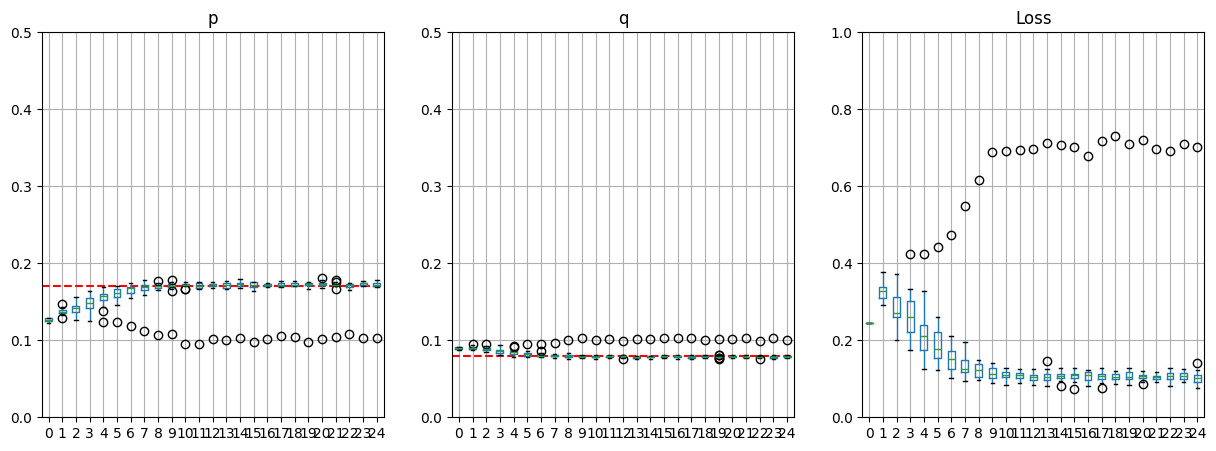

Gamma:  0


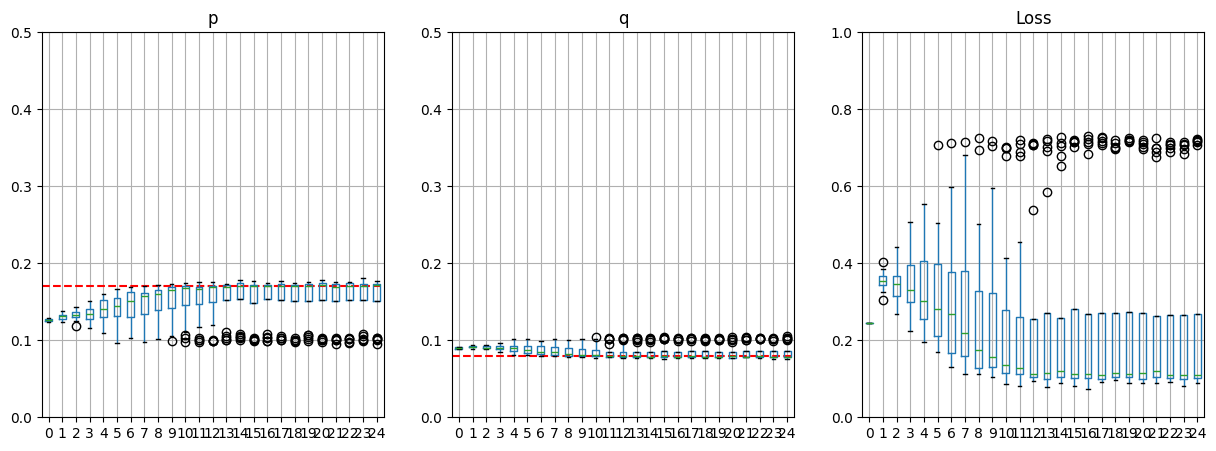

Gamma:  0.1


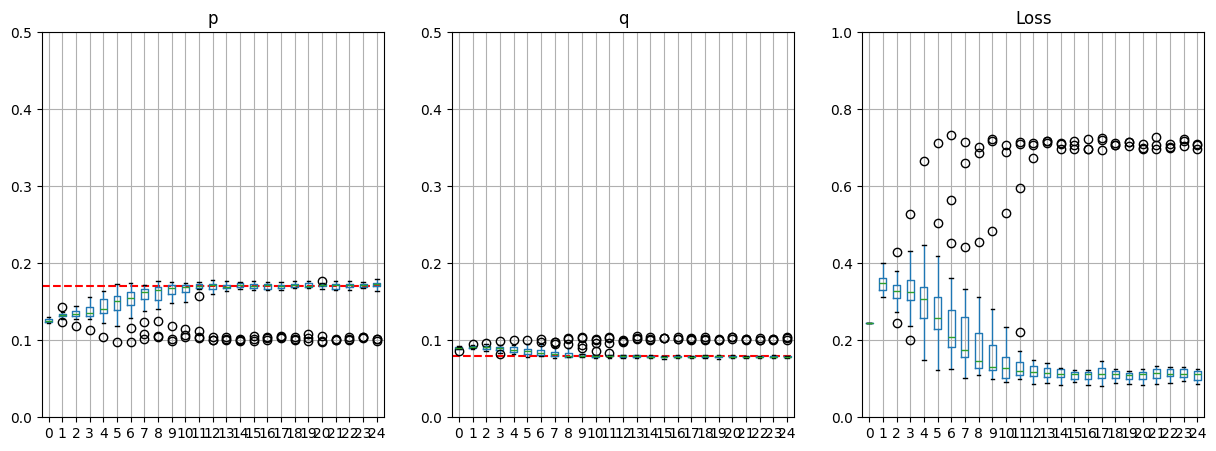

Gamma:  1


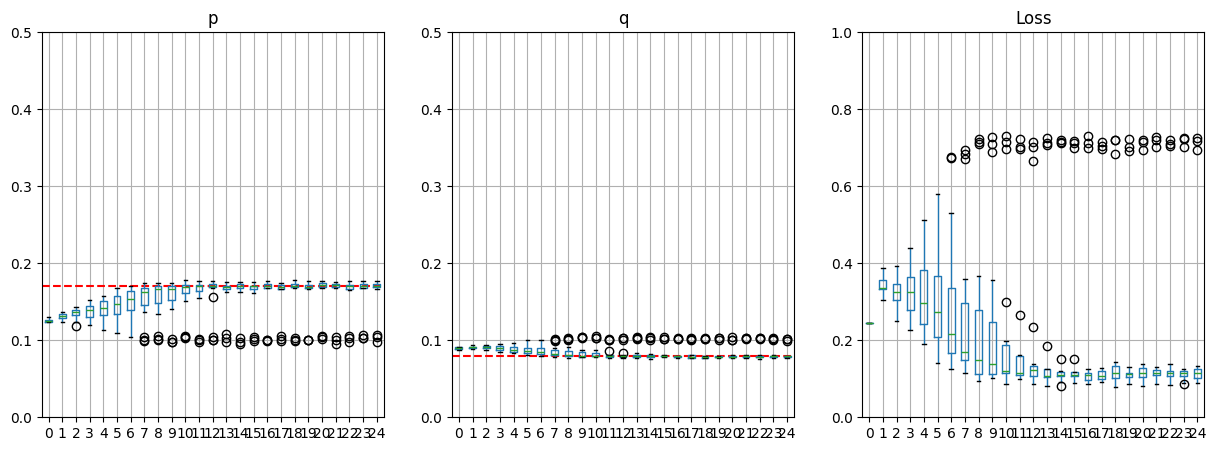

Gamma:  10


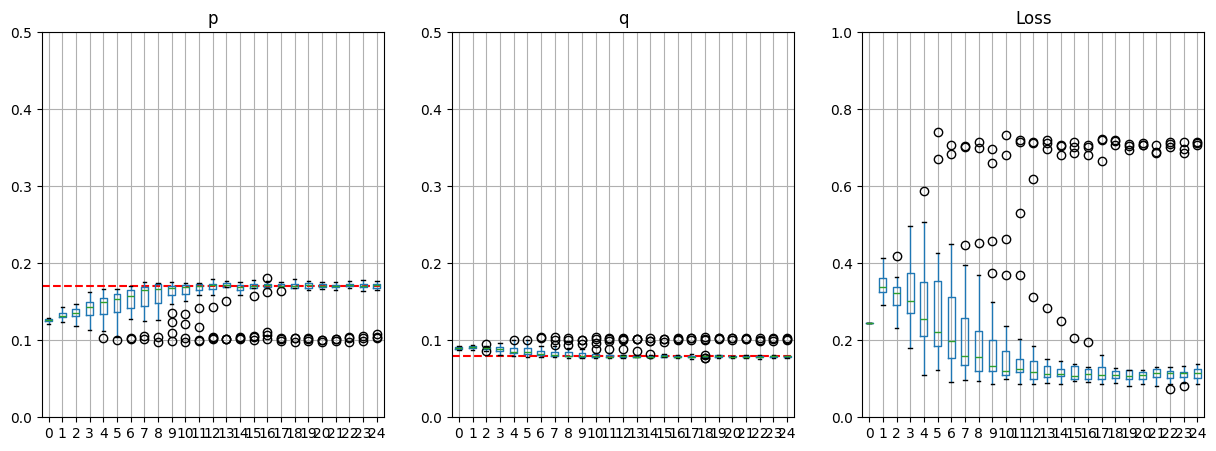

Gamma:  10000


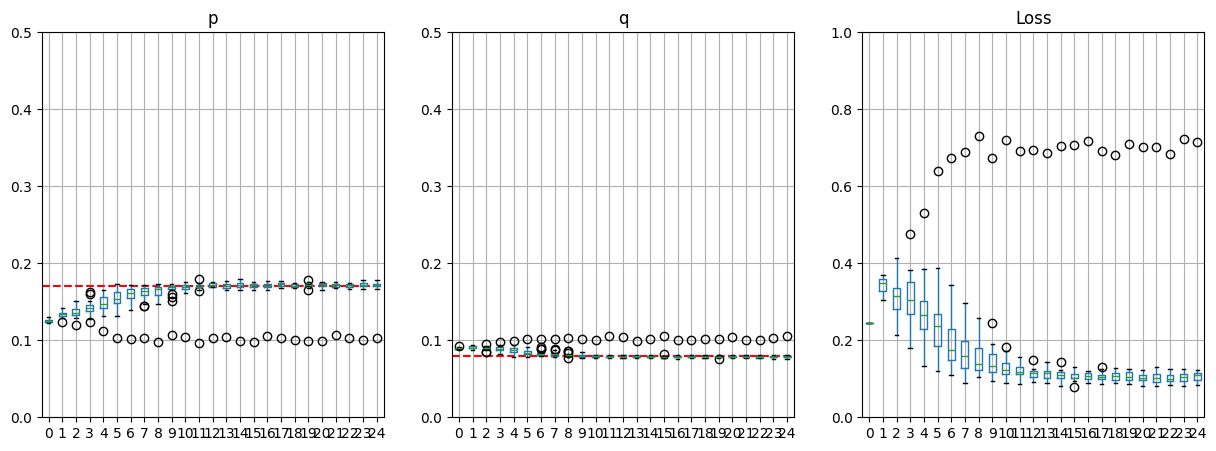

In [123]:
p_lim = 0.5
q_lim = 0.5
loss_lim = 1
pic = True


# plot the results
# deterministic prior first
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title("p")
plt.axhline(y=p, color='r', linestyle='--')
df_p = pd.DataFrame(p_list[0])
df_p.boxplot()
plt.ylim(0, p_lim)
plt.subplot(1,3,2)
plt.title("q")
plt.axhline(y=q, color='r', linestyle='--')
df_q = pd.DataFrame(q_list[0])
df_q.boxplot()
plt.ylim(0, q_lim)
plt.subplot(1,3,3)
plt.title("Loss")
df_loss = pd.DataFrame(loss_list[0])
df_loss.boxplot()
plt.ylim(0, loss_lim)
if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_det_r_{N}_steps_{n_iter}.png')
plt.show()

for a, gamma in enumerate(gamma_list):
    df_p = pd.DataFrame(p_list[a+1])
    df_q = pd.DataFrame(q_list[a+1])
    df_loss = pd.DataFrame(loss_list[a+1])
    print("Gamma: ", gamma)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title("p")
    plt.axhline(y=p, color='r', linestyle='--')
    df_p.boxplot()
    plt.ylim(0, p_lim)
    plt.subplot(1,3,2)
    plt.title("q")
    plt.axhline(y=q, color='r', linestyle='--')
    df_q.boxplot()
    plt.ylim(0, q_lim)
    plt.subplot(1,3,3)
    plt.title("Loss")
    df_loss.boxplot()
    plt.ylim(0, loss_lim)

        
    if pic: plt.savefig(f'gamma_plots/alpha_{alpha}_gamma{gamma}_r_{N}_steps_{n_iter}.png')

    plt.show()
